Binary Text classification using Embeddings From Language Model (ELMo)

Importing the required Libraries for performing the task 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

import spacy
from spacy.cli.download import download
download(model="en_core_web_sm")

from tqdm import tqdm
import re
import time
import pickle

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Uploading the Datasets in CSV Formats and Reading them 

In [7]:
train = pd.read_csv("train.csv")
valid = pd.read_csv("valid.csv")
test = pd.read_csv("test.csv")

Concating the train and Valid Datasets 

In [8]:
train = train.append(valid).reset_index(drop=True)


In [9]:
train.shape

(13784, 2)

These are the Intents in the Dataset train that we have 

In [10]:
train.intent.value_counts()

PlayMusic               2014
GetWeather              1996
BookRestaurant          1981
RateBook                1976
SearchScreeningEvent    1952
SearchCreativeWork      1947
AddToPlaylist           1918
Name: intent, dtype: int64

In [11]:
train.shape, test.shape

((13784, 2), (700, 2))

In [7]:
train.describe()

,text,intent
count,13784,13784
unique,13543,7
top,find movie times,PlayMusic
freq,13,2014


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


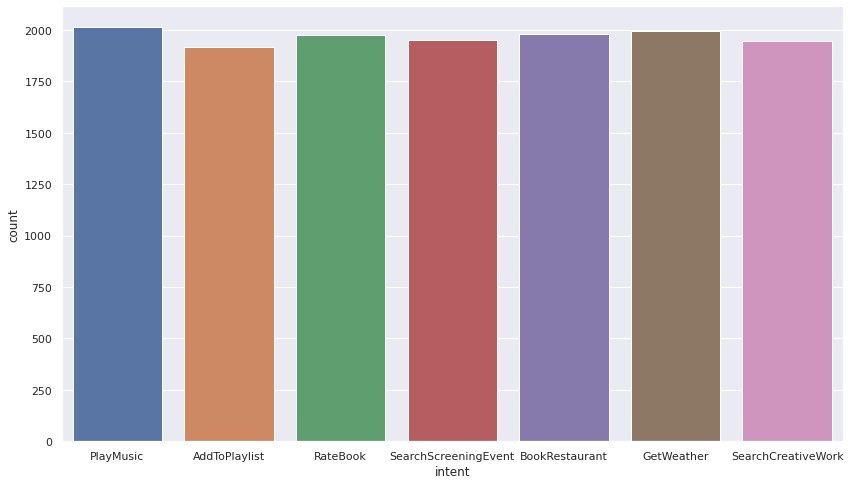

In [12]:
sns.set(rc={'figure.figsize':(14, 8)})
sns.countplot(train.intent)

Cleaning of the Text that has been read from the dataset and Preprocessing it 

In [13]:
train['clean_text'] = train['text'].apply(lambda x: re.sub(r'http\S+', '', x))

test['clean_text'] = test['text'].apply(lambda x: re.sub(r'http\S+', '', x))

In [10]:
train

,text,intent,clean_text
0,listen to westbam alumb allergic on google music,PlayMusic,listen to westbam alumb allergic on google music
1,add step to me to the 50 clásicos playlist,AddToPlaylist,add step to me to the 50 clásicos playlist
2,i give this current textbook a rating value of 1 and a best rating of 6,RateBook,i give this current textbook a rating value of 1 and a best rating of 6
3,play the song little robin redbreast,PlayMusic,play the song little robin redbreast
4,please add iris dement to my playlist this is selena,AddToPlaylist,please add iris dement to my playlist this is selena
...,...,...,...
13779,is any cinema playing the spirit of youth,SearchScreeningEvent,is any cinema playing the spirit of youth
13780,what are the movie times for animated movies in the neighbourhood,SearchScreeningEvent,what are the movie times for animated movies in the neighbourhood
13781,what s the movie schedule at great escape theatres,SearchScreeningEvent,what s the movie schedule at great escape theatres
13782,show the times for cheers for miss bishop at dipson theatres,SearchScreeningEvent,show the times for cheers for miss bishop at dipson theatres


In [14]:
test

,text,intent,clean_text
0,add sabrina salerno to the grime instrumentals playlist,AddToPlaylist,add sabrina salerno to the grime instrumentals playlist
1,i want to bring four people to a place that s close to downtown that serves churrascaria cuisine,BookRestaurant,i want to bring four people to a place that s close to downtown that serves churrascaria cuisine
2,put lindsey cardinale into my hillary clinton s women s history month playlist,AddToPlaylist,put lindsey cardinale into my hillary clinton s women s history month playlist
3,will it snow in mt on june 13 2038,GetWeather,will it snow in mt on june 13 2038
4,play signe anderson chant music that is newest,PlayMusic,play signe anderson chant music that is newest
...,...,...,...
695,find a tv series called armageddon summer,SearchCreativeWork,find a tv series called armageddon summer
696,find politicsnation with al sharpton,SearchCreativeWork,find politicsnation with al sharpton
697,rate this album 0 points out of 6,RateBook,rate this album 0 points out of 6
698,add leah kauffman to my uncharted 4 nathan drake playlist,AddToPlaylist,add leah kauffman to my uncharted 4 nathan drake playlist


Lemmatization: It is process of Text Normalization

using spaCy Library 

In [15]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts):
    output = []
    for i in texts:
        s = [token.lemma_ for token in nlp(i)]
        output.append(' '.join(s))
    return output

In [16]:
train['clean_text'] = lemmatization(train['clean_text'])
test['clean_text'] = lemmatization(test['clean_text'])

In [17]:
train.sample(10)

,text,intent,clean_text
9044,find a movie house with ulterior motive that is closest,SearchScreeningEvent,find a movie house with ulterior motive that be close
10135,book a reservation for louisiana fried chicken this winter in taiwan,BookRestaurant,book a reservation for louisiana fry chicken this winter in taiwan
4967,play a 2009 concerto on deezer,PlayMusic,play a 2009 concerto on deezer
10500,add robin trower to the medieval 50 spotify picks playlist,AddToPlaylist,add robin trower to the medieval 50 spotify pick playlist
787,add the track to the comedy new releases playlist,AddToPlaylist,add the track to the comedy new release playlist
12316,add this track to winnie s post metal playlist,AddToPlaylist,add this track to winnie s post metal playlist
8156,will there be a storm six weeks from now in albania,GetWeather,will there be a storm six week from now in albania
10018,add stephen mcnally to confidence boost,AddToPlaylist,add stephen mcnally to confidence boost
12323,play the most popular twenties record from leland sklar,PlayMusic,play the most popular twenty record from leland sklar
5889,play the greatest james yorkston song,PlayMusic,play the great james yorkston song


Loading the ELMo Model via
 tensor flow hub 


In [18]:

!pip install tensorflow-hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Installing the Tensor Flow 1.15.0 Version 

In [19]:
!pip install tensorflow==1.15
!pip3 install tensorflow_text==1.15

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import tensorflow as tf

In [21]:
tf.__version__

'1.15.0'

In [50]:
import tensorflow_hub as hub

elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)

In [51]:
x = ["the cat is on the mat", "dogs are in the fog"]


embeddings = elmo(x, signature="default", as_dict=True)["elmo"]

embeddings.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


TensorShape([Dimension(2), Dimension(6), Dimension(1024)])

In [24]:
def elmo_vectors(x):
  embeddings = elmo(x.tolist(), signature="default", as_dict=True)["elmo"]

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    
    return sess.run(tf.reduce_mean(embeddings,1))

Dividing the Text into the batches of each 100

In [25]:
list_train = [train[i:i+100] for i in range(0,train.shape[0],100)]
list_test = [test[i:i+100] for i in range(0,test.shape[0],100)]

In [ ]:
elmo_train = [elmo_vectors(x['clean_text']) for x in list_train]
elmo_test = [elmo_vectors(x['clean_text']) for x in list_test]

In [29]:
elmo_train_new = np.concatenate(elmo_train, axis = 0)
elmo_test_new = np.concatenate(elmo_test, axis = 0)

In [31]:
pickle_out = open("elmo_train_task1.pickle","wb")
pickle.dump(elmo_train_new, pickle_out)
pickle_out.close()

pickle_out = open("elmo_test_task1.pickle","wb")
pickle.dump(elmo_test_new, pickle_out)
pickle_out.close()

In [32]:
pickle_in = open("elmo_train_task1.pickle", "rb")
elmo_train_new = pickle.load(pickle_in)

pickle_in = open("elmo_test_task1.pickle", "rb")
elmo_test_new = pickle.load(pickle_in)

In [34]:
from sklearn.model_selection import train_test_split

xtrain, xvalid, ytrain, yvalid = train_test_split(elmo_train_new, 
                                                  train['intent'],  
                                                  random_state=42, 
                                                  test_size=0.2)

In [54]:
from sklearn.model_selection import train_test_split

xtest, xvalid, ytest, yvalid = train_test_split(elmo_test_new, 
                                                  test['intent'],  
                                                  random_state=42, 
                                                  test_size=0.2)

As we need to compare the results we shall create a model using logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lreg = LogisticRegression()
lreg.fit(xtrain, ytrain)
lreg.fit(xtest, ytest)

In [56]:
preds_valid = lreg.predict(xvalid)

In [64]:
f1_score(yvalid, preds_valid, average='micro')

0.9714285714285714

In [63]:
preds_test = lreg.predict(elmo_test_new)

In [62]:
sub = pd.DataFrame({'text':test['text'], 'intent':preds_test})

sub.to_csv("sub_lreg.csv", index=False)